<a href="https://colab.research.google.com/github/nuel071003/JST-Tugas/blob/main/TugasJaringanSyarafTiruanKe-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [25]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [26]:
# load and preprocess CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images = train_images.astype ("float32") / 255.0
test_images = test_images.astype ("float32") / 255.0
train_labels = to_categorical (train_labels, 10)
test_labels = to_categorical (test_labels, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [27]:
# defline a function to create and compile a CNN model
def create_model(activation_function):
  model = models.Sequential ([
      layers.Conv2D(32, (3,3), activation = activation_function, input_shape = (32,32,3)),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(64, (3,3), activation = activation_function),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(64, (3,3), activation = activation_function),
      layers.Flatten(),
      layers.Dense(64, activation = activation_function),
      layers.Dense(10, activation = "softmax") # softmax for output layer
  ])
  model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
  return model

In [28]:
# List of activation functions to compere
activation_functions = ['Linear', 'sigmoid', 'tanh', 'relu', 'leaky_relu']
results = {}

In [29]:
# train and evaluate models with different activation functions
for activation in activation_functions:
    print(f"\nTraining model with {activation} activation...")
    if activation == 'leaky_relu':
        model = models.Sequential ([
            layers.Conv2D(32, (3, 3), input_shape = (32, 32, 3)),
            layers.Activation(tf.keras.layers.LeakyReLU(alpha=0.1)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3)),
            layers.Activation(tf.keras.layers.LeakyReLU(alpha=0.1)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3)),
            layers.Activation(tf.keras.layers.LeakyReLU(alpha=0.1)),
            layers.Flatten(),
            layers.Dense(64),
            layers.Activation(tf.keras.layers.LeakyReLU(alpha=0.1)),
            layers.Dense(10, activation='softmax')
        ])
        model.compile(optimizer = "adam",
                      loss = "categorical_crossentropy",
                      metrics = ["accuracy"])
else:
    model = create_model(activation)


history = model.fit(train_images, train_labels, epochs = 10, batch_size = 64, validation_split =0.2, verbose=2)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 0)


Training model with Linear activation...

Training model with sigmoid activation...

Training model with tanh activation...

Training model with relu activation...

Training model with leaky_relu activation...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/10
625/625 - 56s - 90ms/step - accuracy: 0.4451 - loss: 1.5314 - val_accuracy: 0.5584 - val_loss: 1.2380
Epoch 2/10
625/625 - 57s - 91ms/step - accuracy: 0.6050 - loss: 1.1260 - val_accuracy: 0.6381 - val_loss: 1.0428
Epoch 3/10
625/625 - 79s - 127ms/step - accuracy: 0.6628 - loss: 0.9625 - val_accuracy: 0.6688 - val_loss: 0.9595
Epoch 4/10
625/625 - 82s - 131ms/step - accuracy: 0.6994 - loss: 0.8601 - val_accuracy: 0.6875 - val_loss: 0.9193
Epoch 5/10
625/625 - 82s - 131ms/step - accuracy: 0.7267 - loss: 0.7872 - val_accuracy: 0.6948 - val_loss: 0.8991
Epoch 6/10
625/625 - 54s - 86ms/step - accuracy: 0.7470 - loss: 0.7273 - val_accuracy: 0.6988 - val_loss: 0.8908
Epoch 7/10
625/625 - 82s - 132ms/step - accuracy: 0.7663 - loss: 0.6712 - val_accuracy: 0.7017 - val_loss: 0.8983
Epoch 8/10
625/625 - 81s - 130ms/step - accuracy: 0.7827 - loss: 0.6224 - val_accuracy: 0.7076 - val_loss: 0.8919
Epoch 9/10
625/625 - 82s - 132ms/step - accuracy: 0.7939 - loss: 0.5868 - val_accuracy: 0.7

In [30]:
# Store history, loss, accuracy,and confusion matrix
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(test_labels, axis = 1)
conf_matrix = confusion_matrix(y_true, y_pred_classes)
results[activation] = (history,  test_loss, test_acc, conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [31]:
# Plot the results for accuracy and loss
plt.figure(figsize = (16, 6))

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

Text(0.5, 1.0, 'Training Accuracy For Different Activation Functions on CIFAR-10')

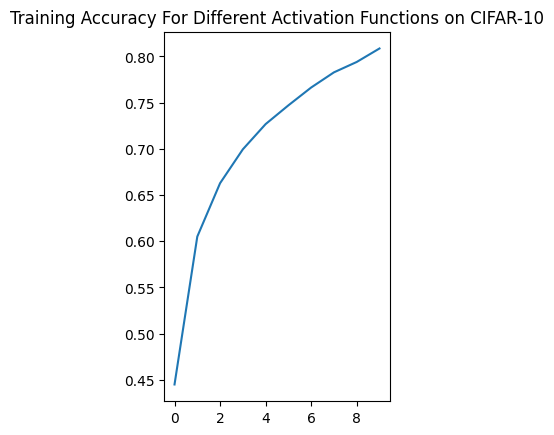

In [38]:
# plot training accuracy
plt.subplot(1, 2, 1)
for activation, (history, _, _, _) in results.items():
 plt.plot(history.history['accuracy'], label=f'{activation} (train)')
plt.title("Training Accuracy For Different Activation Functions on CIFAR-10")

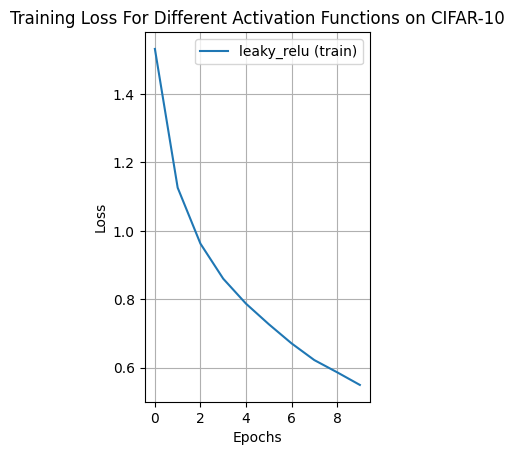

In [40]:
# Plot training loss
plt.subplot(1, 2, 2)
for activation, (history, _, _, _) in results.items():
 plt.plot(history.history["loss"], label = f'{activation} (train)')
plt.title("Training Loss For Different Activation Functions on CIFAR-10")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.grid(True)
plt.show()

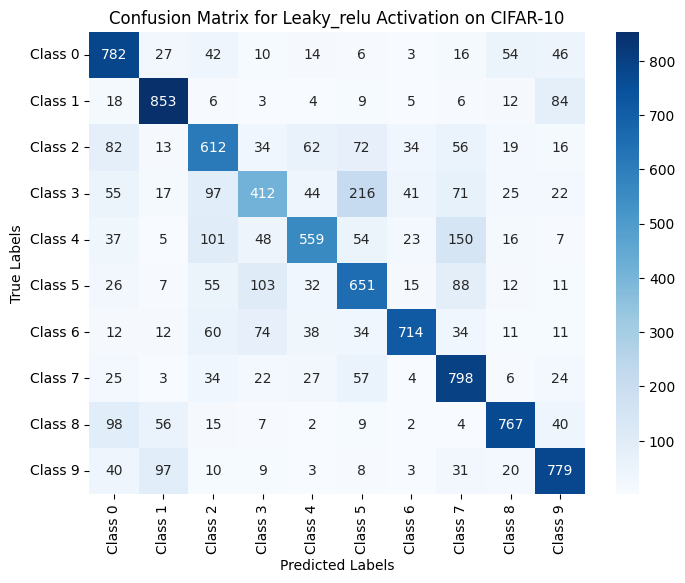

In [46]:
# Display confusion matrix for each activation function
for activation, (_, _, test_acc, conf_matrix) in results.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=[f'Class {i}' for i in range(10)],
                yticklabels=[f'Class {i}' for i in range(10)])
    plt.title(f'Confusion Matrix for {activation.capitalize()} Activation on CIFAR-10')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()